# Word–occupation Association Scores using Normalized PMI (nPMI)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kanika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# import dataset
data = pd.read_csv('WikiBioReformatted_balanced_100k.tsv', sep="\t")
data.head()

,text,person,gender,split
0,"federica de bortoli ( born november 9 , 1976 i...",federica de bortoli,woman,train
1,janice maree edwards ( born 2 february 1962 ) ...,maree edwards,woman,train
2,dejan antić ( serbian cyrillic : Дејан Антић ;...,dejan antić,man,train
3,stephanie pui-mun law ( born 1976 ) is an amer...,stephanie pui-mun law,woman,train
4,perlita neilson ( born margaret phillipa sowde...,perlita neilson,woman,train


In [3]:
# extract only the necessary columns
data = data[['text', 'gender']]
data.head()

,text,gender
0,"federica de bortoli ( born november 9 , 1976 i...",woman
1,janice maree edwards ( born 2 february 1962 ) ...,woman
2,dejan antić ( serbian cyrillic : Дејан Антић ;...,man
3,stephanie pui-mun law ( born 1976 ) is an amer...,woman
4,perlita neilson ( born margaret phillipa sowde...,woman


### Adding Occupation

In [4]:
# extract first sentence

def first_sentence(text):
    """Return everything before the first period in a text."""
    return text.split('.')[0]

data['first_sentence'] = data['text'].apply(first_sentence)

In [5]:
# define occupation keywords

STEM_keywords = ['scientist','engineer','mathematician','physicist','chemist','biologist', 'programmer', 'developer', 'data scientist', 'researcher', 'inventor', 'astronomer', 'geologist', 'ecologist', 'statistician', 'analyst', 'technologist']
Politics_keywords = ['politician','diplomat','senator','governor','mayor', 'president', 'prime minister', 'chancellor', 'king', 'queen', 'emperor', 'empress', 'dictator', 'revolutionary', 'activist', 'legislator', 'ambassador', 'cabinet', 'congressman', 'congresswoman', 'representative', 'parliamentarian', 'campaigner', 'attorney', 'judge', 'jurist', 'lawmaker', 'public servant', 'assemblyman', 'assemblywoman', 'councilor', 'councilwoman', 'mayoral candidate', 'gubernatorial candidate', 'presidential candidate', 'duke', 'duchess', 'prince', 'princess', 'sultan', 'sheikh', 'ayatollah', 'imam', 'rabbi', 'monarch', 'ruler']
Arts_keywords = ['author','writer','poet','artist','painter','actor','actress','musician','singer','composer', 'dancer', 'director', 'producer', 'photographer', 'sculptor', 'designer', 'fashion', 'model', 'rock', 'pop', 'drummer', 'guitarist', 'bassist', 'vocalist', 'conductor', 'orchestra', 'band', 'symphony', 'opera', 'theater', 'film', 'television', 'hostess', 'broadcaster', 'journalist', 'reporter', 'editor', 'publisher', 'critic', 'cartoonist', 'animator', 'illustrator', 'calligrapher', 'ceramist', 'glassblower', 'weaver', 'woodworker', 'host']
Sports_keywords = ['athlete','player','football','basketball','soccer','coach', 'racing', 'swimmer', 'runner', 'gymnast', 'tennis', 'baseball', 'hockey', 'golfer', 'boxer', 'wrestler', 'skater', 'surfer', 'cyclist', 'skier', 'snowboarder', 'volleyball', 'cricket', 'rugby', 'badminton', 'table tennis', 'archer', 'fencer', 'martial artist', 'weightlifter', 'rower', 'sailor', 'equestrian', 'diver', 'canoeist', 'kayaker', 'triathlete', 'pentathlete', 'decathlete', 'grandmaster', 'sprinter', 'long-distance runner', 'marathoner', 'hurdler', 'pole vaulter', 'high jumper', 'long jumper', 'triple jumper', 'shot putter', 'discus thrower', 'hammer thrower', 'javelin thrower']

# map first sentence to broad occupation group
def map_sentence_to_group(sentence):
    sentence_lower = sentence.lower()
    
    for kw in STEM_keywords:
        if kw in sentence_lower:
            return 'STEM'
    for kw in Politics_keywords:
        if kw in sentence_lower:
            return 'Politics'
    for kw in Arts_keywords:
        if kw in sentence_lower:
            return 'Arts'
    for kw in Sports_keywords:
        if kw in sentence_lower:
            return 'Sports'
    return 'Other'

data['occupation_group'] = data['first_sentence'].apply(map_sentence_to_group)

#drop first sentence column
data = data.drop(columns=['first_sentence'])

print(data['occupation_group'].value_counts())
data.head()

occupation_group
Arts        31299
Sports      29959
Other       22283
Politics    14320
STEM         2139
Name: count, dtype: int64


,text,gender,occupation_group
0,"federica de bortoli ( born november 9 , 1976 i...",woman,Arts
1,janice maree edwards ( born 2 february 1962 ) ...,woman,Politics
2,dejan antić ( serbian cyrillic : Дејан Антић ;...,man,Sports
3,stephanie pui-mun law ( born 1976 ) is an amer...,woman,Arts
4,perlita neilson ( born margaret phillipa sowde...,woman,Arts


In [6]:
# Analyze Other group to see if we can find more occupation keywords
other_sentences = data[data['occupation_group'] == 'Other']['text']
other_sentences.head(20)

20     henrietta johnson louis ( 1902 -- 18 january 1...
28     sarah franklin ( born 1960 ) is an american an...
33     mark heckles is the son of 1976 manx grand pri...
38     tiffany williamson is an american corporate la...
49     elizabeth diane frederickson downs ( born augu...
54     martine aurillac ( born 28 april 1939 ) is a m...
71     henry winston holt ( september 14 , 1864 -- oc...
77     blessed margaret of castello ( 1287 -- 1320 ) ...
88     nancy lee bass ( 1917-2013 ) was an american p...
93     james b. stephens ( november 9 , 1806 -- march...
94     kalamandalam v. satyabhama is an indian classi...
95     cynthia moore chestnut ( born july 25 , 1949 )...
98     carl nicks , jr. ( born may 14 , 1985 ) is a f...
99     olive oatman ( 1837 -- march 20 , 1903 ) was a...
132    friedrich-wilhelm thorwest ( 6 december 1898 -...
133    frank joseph pallone , jr. ( born october 30 ,...
140    e. l. `` bert '' smedley ( 1 april 1905 -- 30 ...
143    józef zapędzki ( born 11

### Tokenization and Filtering

In [7]:
# tokenize the text data
data['text'] = data['text'].astype(str).str.lower().str.split()
data.head()

,text,gender,occupation_group
0,"[federica, de, bortoli, (, born, november, 9, ...",woman,Arts
1,"[janice, maree, edwards, (, born, 2, february,...",woman,Politics
2,"[dejan, antić, (, serbian, cyrillic, :, дејан,...",man,Sports
3,"[stephanie, pui-mun, law, (, born, 1976, ), is...",woman,Arts
4,"[perlita, neilson, (, born, margaret, phillipa...",woman,Arts


In [8]:
# remove english stopwords via NLTK
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data.head()

,text,gender,occupation_group
0,"[federica, de, bortoli, (, born, november, 9, ...",woman,Arts
1,"[janice, maree, edwards, (, born, 2, february,...",woman,Politics
2,"[dejan, antić, (, serbian, cyrillic, :, дејан,...",man,Sports
3,"[stephanie, pui-mun, law, (, born, 1976, ), am...",woman,Arts
4,"[perlita, neilson, (, born, margaret, phillipa...",woman,Arts


In [9]:
# remove punctuations that are part of string.punctuation
import string
punctuations = set(string.punctuation)
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in punctuations])
data.head()

,text,gender,occupation_group
0,"[federica, de, bortoli, born, november, 9, 197...",woman,Arts
1,"[janice, maree, edwards, born, 2, february, 19...",woman,Politics
2,"[dejan, antić, serbian, cyrillic, дејан, антић...",man,Sports
3,"[stephanie, pui-mun, law, born, 1976, american...",woman,Arts
4,"[perlita, neilson, born, margaret, phillipa, s...",woman,Arts


In [10]:
# ignore tokens with total corpus frequency < 10
from collections import Counter

# flatten the list of lists of words into a single list of words
all_words = [word for sublist in data['text'] for word in sublist]
word_counts = Counter(all_words)

# ignore tokens with total corpus frequency < 10
frequent_words = {word for word, count in word_counts.items() if count >= 10}
data['text'] = data['text'].apply(lambda x: [word for word in x if word in frequent_words])
data.head()

,text,gender,occupation_group
0,"[federica, de, born, november, 9, 1976, rome, ...",woman,Arts
1,"[janice, maree, edwards, born, 2, february, 19...",woman,Politics
2,"[dejan, serbian, cyrillic, born, 1968, serbian...",man,Sports
3,"[stephanie, law, born, 1976, american, painter...",woman,Arts
4,"[neilson, born, margaret, 11, june, 1933, --, ...",woman,Arts


### nPMI analysis for Occupation Groups

In [ ]:
# N be the total number of tokens across all biographies in the dataset
N = sum(len(text) for text in data['text'])
print(N)

6066521


In [ ]:
# total token count of word w across all documents
def total_token_count(word):
    return sum(text.count(word) for text in data['text'])
print(total_token_count('november'))

11112


In [ ]:
# for an occupation group o, the set of documents within that occupation group
def documents_by_occupation_group(group):
    return data[data['occupation_group'] == group]
print(documents_by_occupation_group('woman').head())

Empty DataFrame
Columns: [text, gender, occupation_group]
Index: []


In [ ]:
# number of tokens in document with occupation group o
def tokens_in_occupation_group(group):
    docs = documents_by_occupation_group(group)
    return sum(len(text) for text in docs['text'])
print(tokens_in_occupation_group('STEM'))

138479


In [ ]:
# total token count of word w inside documents of occupation group o
def total_tokens_by_word_and_occupation_group(word, occupation_group):
    docs = documents_by_occupation_group(occupation_group)
    return sum(text.count(word) for text in docs['text'])
print(total_tokens_by_word_and_occupation_group('november', 'STEM'))

217


In [ ]:
# calculate PMI between a word w and occupation group o
def calculate_pmi(w, o):
    numerator = N * total_tokens_by_word_and_occupation_group(w, o)
    if numerator == 0:
        return None
    denominator = total_token_count(w) * tokens_in_occupation_group(o)   
    pmi = np.log2(numerator / denominator)
    return pmi
print(calculate_pmi('november', 'STEM'))

-0.22514936471449537


In [ ]:
# calculate nPMI to account for relative frequency of words
def calculate_npmi(w, o):
    pmi = calculate_pmi(w, o)
    c_wg = total_tokens_by_word_and_occupation_group(w, o)

    if pmi is None or c_wg == 0:
        return None
    
    denominator = -np.log2(c_wg / N)
    npmi = pmi / denominator
    if denominator == 0:
        return None

    return npmi
print(calculate_npmi('intelligent', 'STEM'))

0.08424829423974022


### Plot and Analyze Top Associations

In [ ]:
# Analyze top 30 tokens by nPMI for occupation groups
def top_npmi_tokens(occupation, top_n=30):
    unique_words = set(word for sublist in data['text'] for word in sublist)
    npmi_scores = {}

    for word in unique_words:
        npmi = calculate_npmi(word, occupation)
        if npmi is not None:
            npmi_scores[word] = npmi

    # Return top N tokens by nPMI score
    sorted_tokens = sorted(npmi_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_tokens[:top_n]

top_tokens_stem = top_npmi_tokens('STEM')
top_tokens_politics = top_npmi_tokens('Politics')
top_tokens_arts = top_npmi_tokens('Arts')
top_tokens_sports = top_npmi_tokens('Sports')
top_tokens_other = top_npmi_tokens('Other')

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_19933/3090407573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='mako')


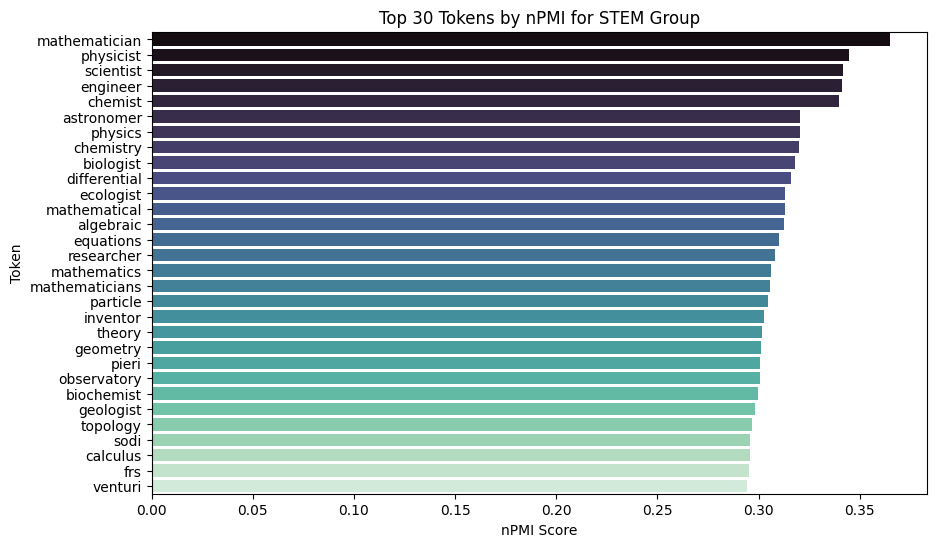

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_19933/3090407573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='mako')


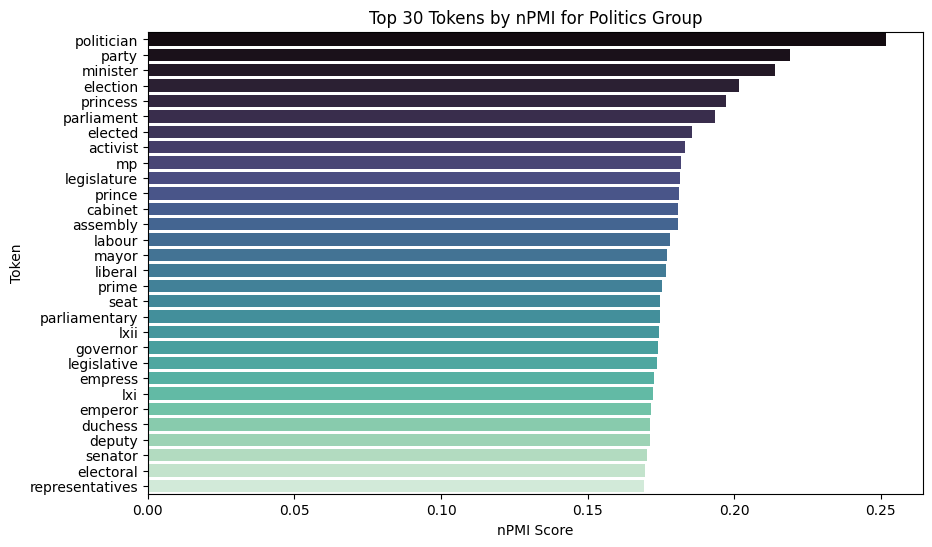

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_19933/3090407573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='mako')


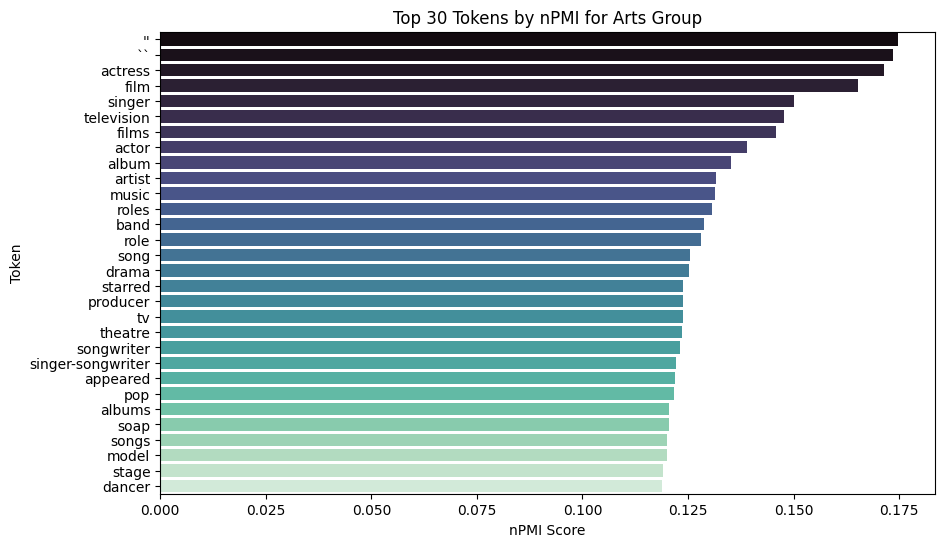

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_19933/3090407573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='mako')


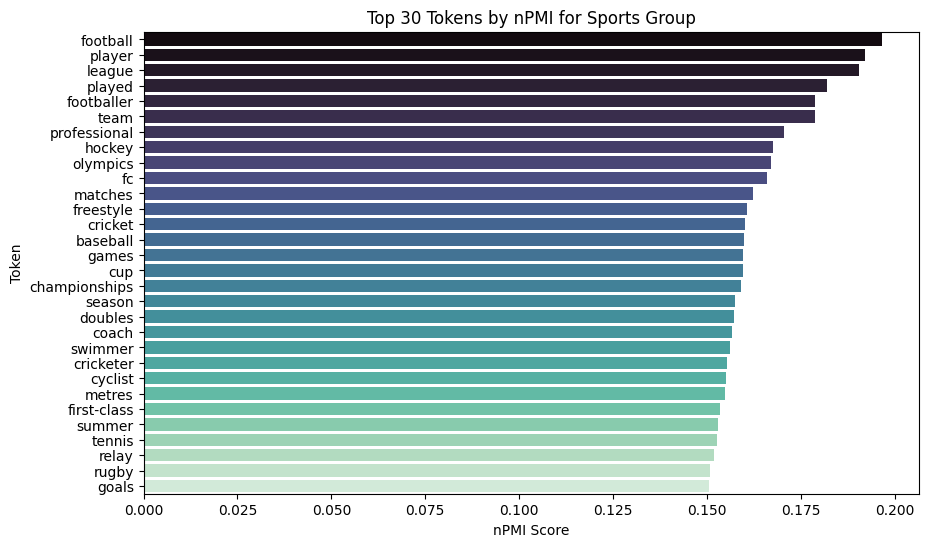

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_19933/3090407573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='mako')


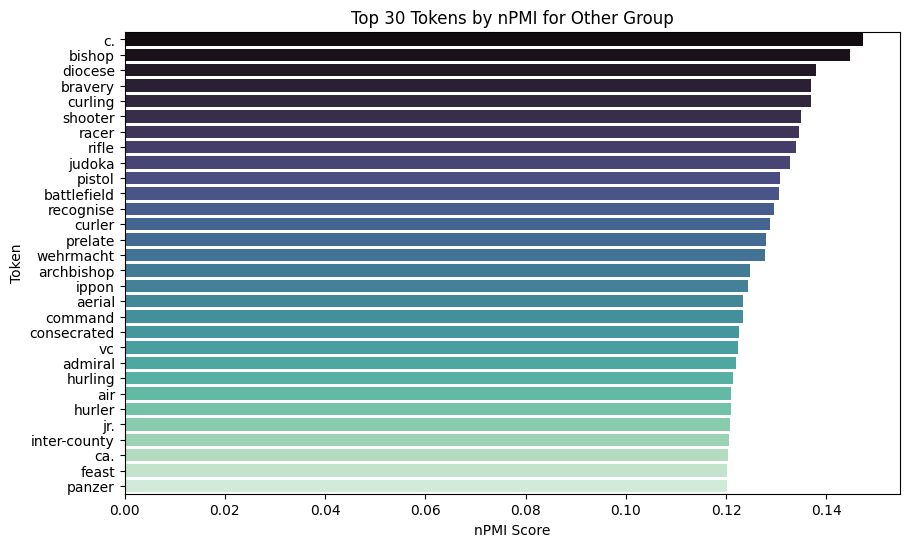

In [ ]:
# Plot top 30 tokens by nPMI for each occupation group
def plot_top_tokens(top_tokens, occupation_group):
    tokens, npmi_scores = zip(*top_tokens)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=npmi_scores, y=tokens, palette='mako')
    plt.title(f'Top 30 Tokens by nPMI for {occupation_group} Group')
    plt.xlabel('nPMI Score')
    plt.ylabel('Token')
    plt.show()

plot_top_tokens(top_tokens_stem, 'STEM')
plot_top_tokens(top_tokens_politics, 'Politics')
plot_top_tokens(top_tokens_arts, 'Arts')
plot_top_tokens(top_tokens_sports, 'Sports')
plot_top_tokens(top_tokens_other, 'Other')


### nPMI analysis for Occupation and Gender Groups 

In [11]:
# N be the total number of tokens across all biographies in the dataset
N = sum(len(text) for text in data['text'])
print(N)

6066521


In [12]:
# total token count of word w across all documents
def total_token_count(word):
    return sum(text.count(word) for text in data['text'])
print(total_token_count('november'))

11112


In [13]:
# for an occupation group o and gender g, the set of documents within that occupation group and gender
def documents_by_occupation_gender_group(group, gender):
    return data[(data['occupation_group'] == group) & (data['gender'] == gender)]
print(documents_by_occupation_gender_group('STEM', 'woman').head())

                                                   text gender  \
285   [ruth, january, 12, 1916, --, october, 5, 2013...  woman   
446   [professor, maria, scientist, working, develop...  woman   
624   [sáenz, vargas, born, 8, august, 1963, mexican...  woman   
1123  [rose, whelan, circa, 1904, --, 2000, 20th-cen...  woman   
1274  [ilse, april, 25, 1891, february, 6, 1990, phy...  woman   

     occupation_group  
285              STEM  
446              STEM  
624              STEM  
1123             STEM  
1274             STEM  


In [14]:
# number of tokens in document with occupation group o and gender g
def tokens_in_occupation_gender_group(group, gender):
    docs = documents_by_occupation_gender_group(group, gender)
    return sum(len(text) for text in docs['text'])
print(tokens_in_occupation_gender_group('STEM', 'woman'))

42178


In [15]:
# total token count of word w inside documents of occupation group o, gender g
def total_tokens_by_word_and_occupation_gender_group(word, group, gender):
    docs = documents_by_occupation_gender_group(group, gender)
    return sum(text.count(word) for text in docs['text'])
print(total_tokens_by_word_and_occupation_gender_group('november', 'STEM', 'woman'))

66


In [16]:
# calculate PMI between a word w and occupation group o
def calculate_pmi_gender(w, o, g):
    numerator = N * total_tokens_by_word_and_occupation_gender_group(w, o, g)
    if numerator == 0:
        return None
    denominator = total_token_count(w) * tokens_in_occupation_gender_group(o, g)   
    pmi = np.log2(numerator / denominator)
    return pmi
print(calculate_pmi_gender('november', 'STEM', 'woman'))

-0.22720185812572827


In [17]:
# calculate nPMI to account for relative frequency of words
def calculate_npmi_gender(w, o, g):
    pmi = calculate_pmi_gender(w, o, g)
    c_wg = total_tokens_by_word_and_occupation_gender_group(w, o, g)

    if pmi is None or c_wg == 0:
        return None
    
    denominator = -np.log2(c_wg / N)
    npmi = pmi / denominator
    if denominator == 0:
        return None

    return npmi
print(calculate_npmi_gender('intelligent', 'STEM', 'woman'))

0.08409093778199364


### Plot and Analyze Top Associations

In [18]:
# Analyze top 30 tokens by nPMI for occupation and gender groups 
def top_npmi_tokens_gender_occ(occupation, gender, top_n=30):
    unique_words = set(word for sublist in data['text'] for word in sublist)
    npmi_scores = {}

    for word in unique_words:
        npmi = calculate_npmi_gender(word, occupation, gender)
        if npmi is not None:
            npmi_scores[word] = npmi

    # Return top N tokens by nPMI score
    sorted_tokens = sorted(npmi_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_tokens[:top_n]

top_tokens_stem_woman = top_npmi_tokens_gender_occ('STEM', 'woman')
print("done")
top_tokens_stem_man = top_npmi_tokens_gender_occ('STEM', 'man')
print("done")
top_tokens_politics_woman = top_npmi_tokens_gender_occ('Politics', 'woman')
print("done")
top_tokens_politics_man = top_npmi_tokens_gender_occ('Politics', 'man')
print("done")
top_tokens_arts_woman = top_npmi_tokens_gender_occ('Arts', 'woman')
print("done")
top_tokens_arts_man = top_npmi_tokens_gender_occ('Arts', 'man')
print("done")
top_tokens_sports_woman = top_npmi_tokens_gender_occ('Sports', 'woman')
print("done")
top_tokens_sports_man = top_npmi_tokens_gender_occ('Sports', 'man')
print("done")
top_tokens_other_woman = top_npmi_tokens_gender_occ('Other', 'woman')
print("done")
top_tokens_other_man = top_npmi_tokens_gender_occ('Other', 'man')
print("done")

done
done
done
done
done
done
done
done
done
done


/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


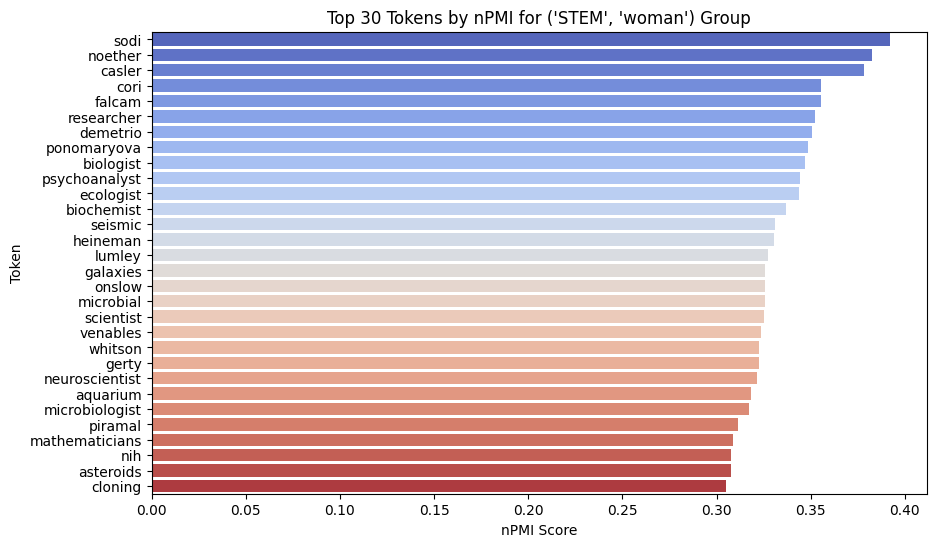

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


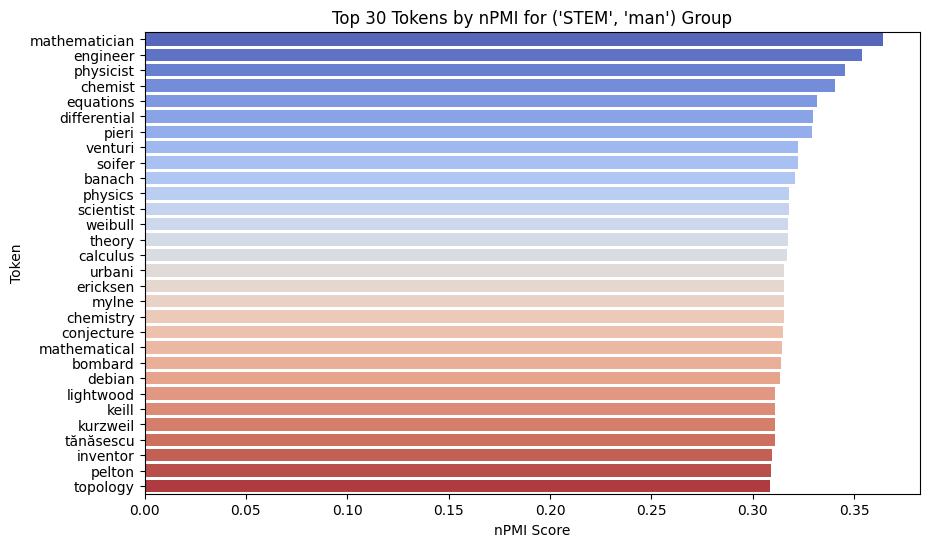

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


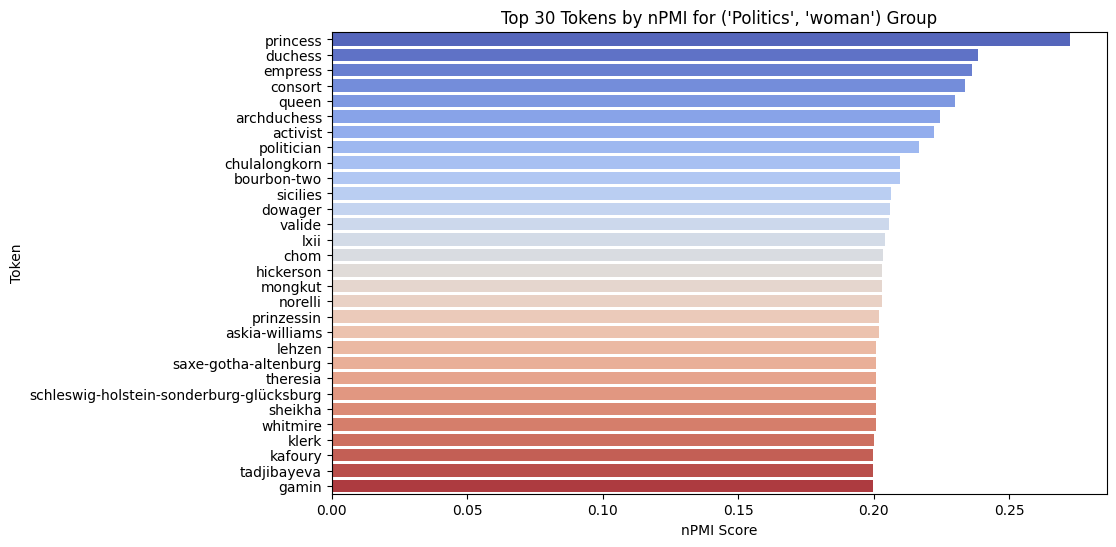

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


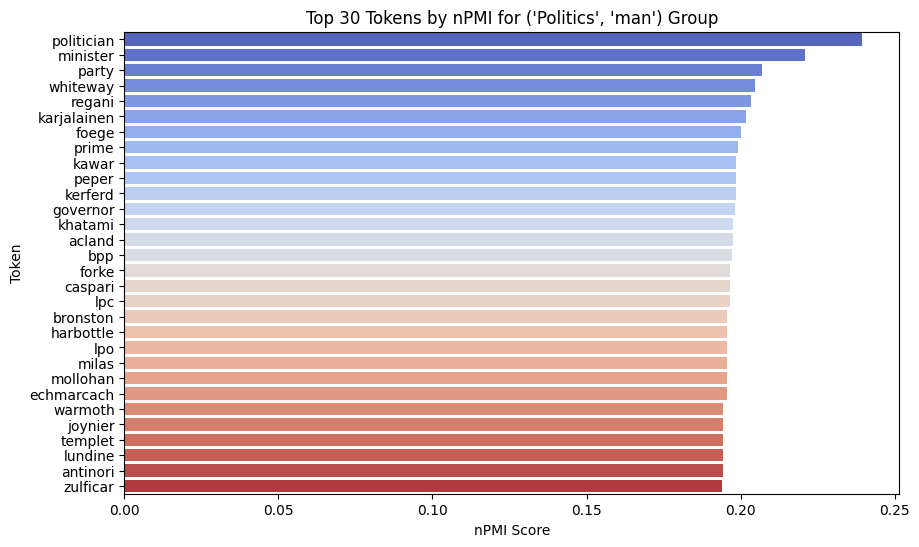

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


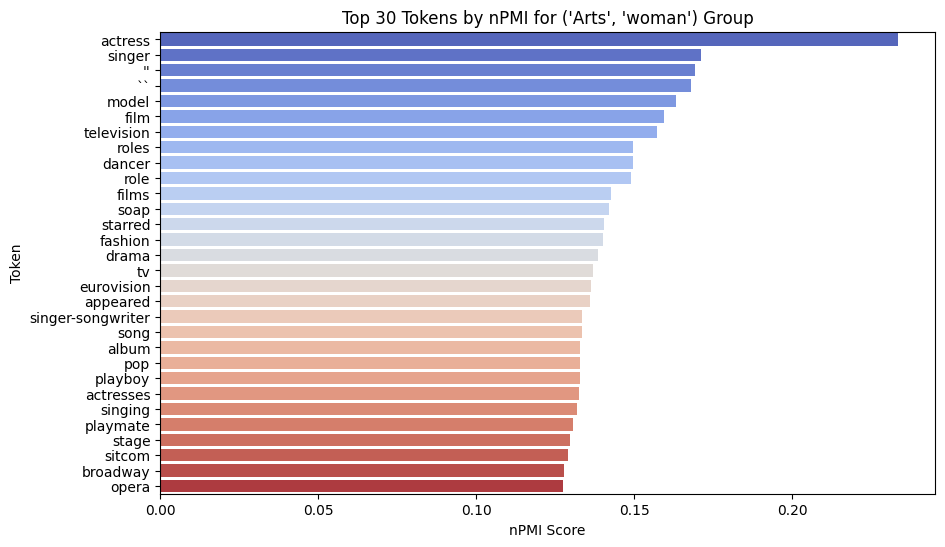

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


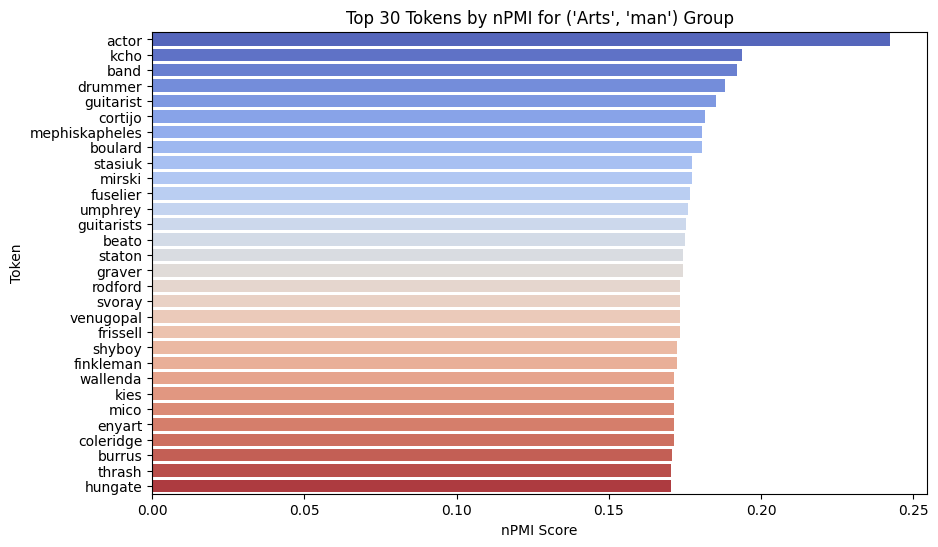

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


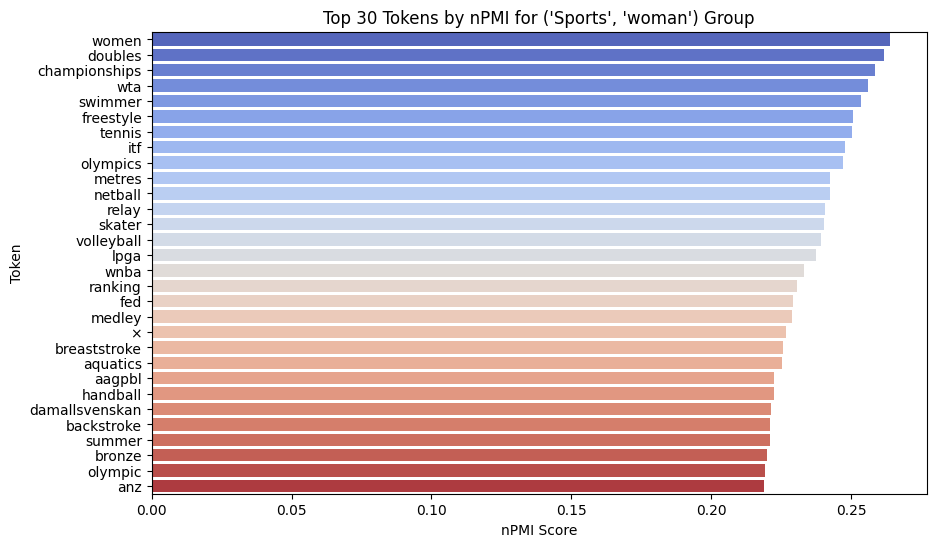

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


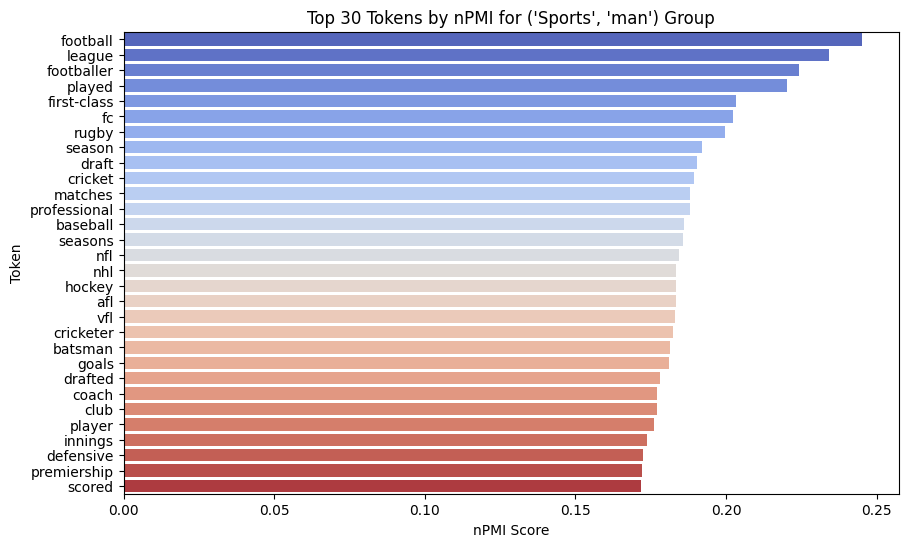

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


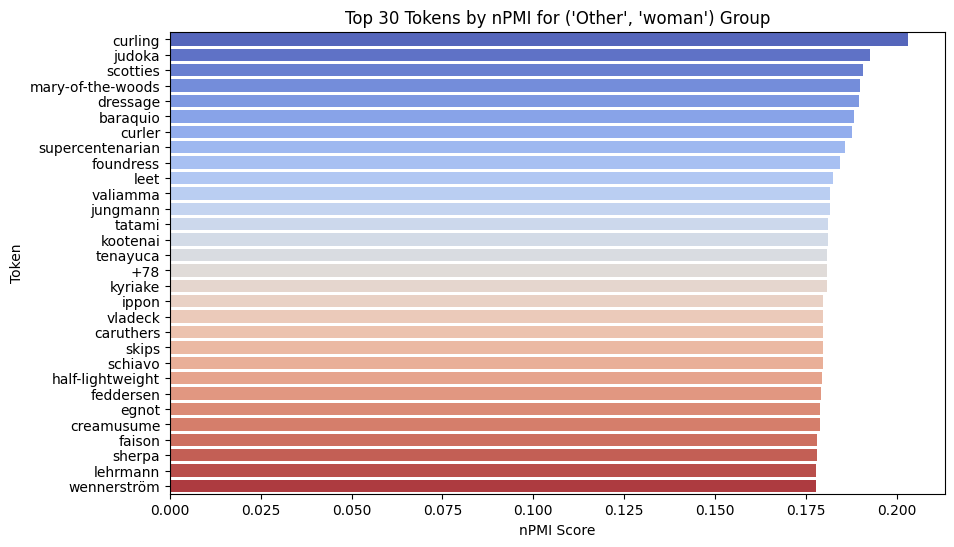

/var/folders/h6/93p_2snd3bl3v008snqlzq7m0000gn/T/ipykernel_94582/3932011081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')


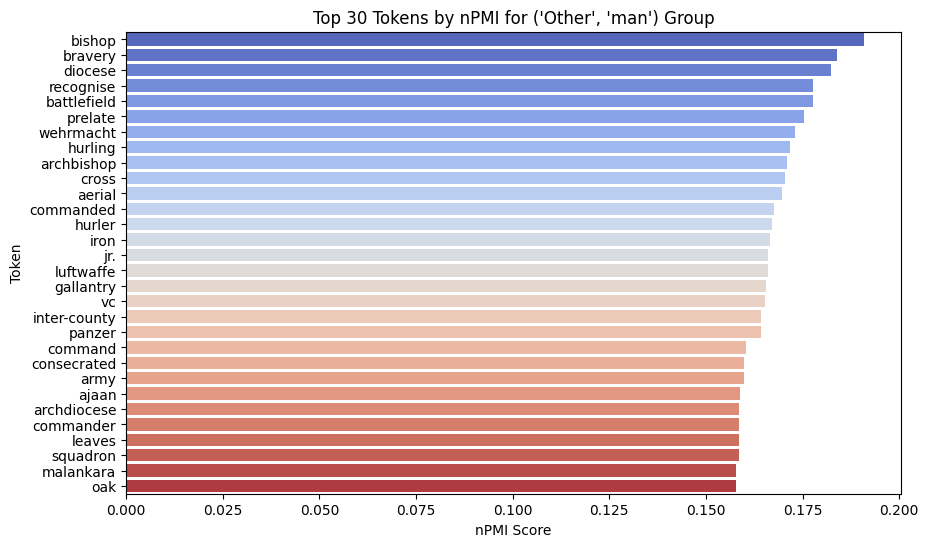

In [20]:
# Plot top 30 tokens by nPMI for each occupation and gender group
def plot_top_tokens(top_tokens, occupation, gender):
    tokens, npmi_scores = zip(*top_tokens)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=npmi_scores, y=tokens, palette='coolwarm')
    plt.title(f'Top 30 Tokens by nPMI for {occupation, gender} Group')
    plt.xlabel('nPMI Score')
    plt.ylabel('Token')
    plt.show()

plot_top_tokens(top_tokens_stem_woman, 'STEM', 'woman')
plot_top_tokens(top_tokens_stem_man, 'STEM', 'man')
plot_top_tokens(top_tokens_politics_woman, 'Politics', 'woman')
plot_top_tokens(top_tokens_politics_man, 'Politics', 'man')
plot_top_tokens(top_tokens_arts_woman, 'Arts', 'woman')
plot_top_tokens(top_tokens_arts_man, 'Arts', 'man')
plot_top_tokens(top_tokens_sports_woman, 'Sports', 'woman')
plot_top_tokens(top_tokens_sports_man, 'Sports', 'man')
plot_top_tokens(top_tokens_other_woman, 'Other', 'woman')
plot_top_tokens(top_tokens_other_man, 'Other', 'man')